In [5]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error

In [ ]:
combine_data = pd.read_csv('Downloads/nba_draft_combine_all_years.csv')

In [7]:
combine_data

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [8]:
del combine_data['Unnamed: 0']

In [9]:
combine_data

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [10]:
# combine_data = combine_data[combine_data['Draft pick'] != 'NaN']

In [11]:
combine_data['Draft pick'].describe()

count    384.000000
mean      28.492188
std       15.888973
min        1.000000
25%       15.000000
50%       28.000000
75%       41.000000
max       60.000000
Name: Draft pick, dtype: float64

In [12]:
combine_data = combine_data.dropna(subset=['Draft pick'])

In [13]:
combine_data

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Monte Morris,2017,51.0,73.25,74.50,76.00,96.5,33.5,130.0,28.0,124.5,175.0,6.9,8.25,8.75,NaN,11.00,3.19
490,Edmond Sumner,2017,52.0,76.00,77.75,81.00,102.5,NaN,NaN,NaN,NaN,176.0,8.3,8.25,9.00,NaN,NaN,NaN
491,Kadeem Allen,2017,53.0,73.00,74.25,81.25,99.5,35.5,135.0,33.0,132.5,192.0,6.4,8.50,8.75,NaN,11.24,3.15
492,Alec Peters,2017,54.0,79.25,80.75,82.75,105.0,NaN,NaN,NaN,NaN,232.0,8.8,8.75,10.00,NaN,NaN,NaN


In [14]:
combine_data = combine_data.fillna(combine_data.mean())

/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_6768/1938125176.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combine_data = combine_data.fillna(combine_data.mean())


In [15]:
combine_data.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

In [16]:
combine_data.columns

Index(['Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

In [17]:
features = ['Height (With Shoes)', 'Wingspan',
       'Standing reach', 'Vertical (Max)', 'Vertical (Max Reach)',
       'Vertical (No Step)', 'Vertical (No Step Reach)', 'Weight', 'Body Fat',
       'Hand (Length)', 'Hand (Width)', 'Bench', 'Agility', 'Sprint']
X = combine_data[features]

In [18]:
y = combine_data['Draft pick']

In [19]:
X.shape

(384, 14)

In [20]:
y.shape

(384,)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
clf = DecisionTreeRegressor()
y_train

107    19.0
311    59.0
106    18.0
301    46.0
7      17.0
       ... 
414    33.0
344    20.0
9      19.0
274    10.0
309    56.0
Name: Draft pick, Length: 307, dtype: float64

In [23]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
y_pred = clf.predict(x_test)

In [25]:
accuracy_score(y_pred, y_test)

0.012987012987012988

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg = LinearRegression()

In [28]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = lin_reg.predict(x_test)

In [30]:
mean_squared_error(y_test, y_pred)

220.28445869968274

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [32]:
r2

0.027554285444868265

In [33]:
lin_reg.coef_

array([ 0.0961232 , -0.44710981,  0.15181186,  1.06570108, -1.4321665 ,
       -0.07552734,  0.56328724, -0.10279786,  0.58157369, -0.45138379,
       -0.208218  ,  0.41111346,  5.0642724 , 30.46401669])

In [34]:
a = np.argmin(lin_reg.coef_)
a

4

In [35]:
features[np.argmin(lin_reg.coef_)]

'Vertical (Max Reach)'

In [36]:
# features[np.argmax(lin_reg.coef_)]

In [37]:
max_indices = list(np.argsort(lin_reg.coef_)[-5:])
print(max_indices)

[6, 8, 3, 12, 13]


In [38]:
# for i in max_indices:
#     print(features[i])
features = np.array(features)

In [39]:
imp_features = features[max_indices]

In [40]:
X = combine_data[imp_features]
y = combine_data['Draft pick']

X.shape
y.shape

(384,)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lin_reg.predict(x_test)
mean_squared_error(y_pred, y_test)

255.8667642940963

In [44]:
r2_score(y_test, y_pred)

0.055375988346143434

In [45]:
features = np.array(['Height (With Shoes)', 'Wingspan',
       'Standing reach', 'Vertical (Max)', 'Vertical (Max Reach)',
       'Vertical (No Step)', 'Vertical (No Step Reach)', 'Weight', 'Body Fat',
       'Hand (Length)', 'Hand (Width)', 'Bench', 'Agility', 'Sprint'])
X = combine_data[features]

from sklearn.feature_selection import f_regression

# X is your feature matrix (10 features) and y is your target variable
# Assuming X and y are numpy arrays or pandas DataFrames/Series
f_values, p_values = f_regression(X, y)

# Select the top 5 features with the lowest p-values
top_feature_indices = np.argsort(p_values)[:5]
# top_feature_indices
# top_features = X[:, top_feature_indices]
top_features = features[top_feature_indices]

In [46]:
top_features

array(['Vertical (Max Reach)', 'Vertical (No Step Reach)', 'Wingspan',
       'Sprint', 'Standing reach'], dtype='<U24')

In [47]:
X = X[features]

In [48]:
X.shape

(384, 14)

In [49]:
y.shape

(384,)

In [50]:
X = combine_data[top_features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1336)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = lin_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

rmse is 15.779639381394459


In [52]:
r2_score(y_test, y_pred)

0.11307990872388884

In [53]:
y_pred

array([31.06064123, 23.39115966, 32.02779871, 23.12581249, 27.43402376,
       25.78672821, 28.01891633, 22.39869586, 33.59945483, 24.27564074,
       33.21975544, 22.65996377, 24.38195998, 25.938682  , 34.2805678 ,
       31.60436413, 24.42861466, 23.21921645, 28.38328717, 42.8018813 ,
       33.30907324, 31.34057103, 31.22586719, 36.99084249, 35.29981433,
       28.98997286, 19.6424108 , 22.52988737, 33.66449189, 31.57363038,
       35.80442143, 31.79190266, 30.47281085, 30.74655714, 32.34382791,
       33.44064163, 25.91566555, 23.01884825, 21.28022691, 30.86555771,
       27.08160681, 29.81861075, 28.04211822, 25.95186159, 36.90632967,
       26.62483863, 24.93800516, 25.17265936, 30.92114614, 31.76999504,
       25.82508962, 24.61448344, 22.55304924, 28.77683386, 27.31189007,
       32.32420934, 30.58953645, 23.70837345, 26.4205945 , 26.85893981,
       26.26968487, 33.81122458, 22.41316178, 26.53945542, 34.51335067,
       27.76126316, 32.10026181, 27.82827743, 29.87431338, 28.22

In [54]:
y_test

185    41.0
69     32.0
218    18.0
22      3.0
0       1.0
       ... 
5      15.0
306    50.0
98     10.0
192     5.0
230    31.0
Name: Draft pick, Length: 77, dtype: float64

In [55]:
X_new = combine_data[features]
y_new = combine_data['Draft pick']

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [58]:
# X = combine_data[top_features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1336)
lasso_reg = Lasso(alpha=1e-10)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1e-10)

In [59]:
y_pred = lasso_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

rmse is 15.779639381494523


In [60]:
r2_score(y_test, y_pred)

0.1130799087126404

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
X_new[features] = scaler.fit_transform(X_new[features])

/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_6768/848353956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[features] = scaler.fit_transform(X_new[features])


In [63]:
X_new

,Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0.922806,0.183584,0.334080,0.042090,5.399584e-01,7.544187e-01,9.705654e-01,1.330789,0.452173,0.000000,0.000000,3.042151e+00,-6.872225e-01,-0.068741
1,-0.228702,-0.394991,0.027785,0.497761,5.399584e-01,2.267494e-01,2.525092e-01,-0.076090,-0.826990,0.000000,0.000000,-3.700712e-01,-2.892736e-01,-0.912033
2,-0.612538,-0.073561,-0.176412,-0.109800,-2.471599e-01,5.785289e-01,2.525092e-01,0.004303,-1.115833,0.000000,0.000000,-6.325498e-01,-2.494787e-01,-1.249350
3,0.769271,0.247870,0.538276,-0.413581,4.087720e-01,-8.285890e-01,1.328332e-01,0.768038,0.575963,0.000000,0.000000,1.992236e+00,-3.489659e-01,-0.153070
4,0.999573,1.019302,1.252965,-0.717362,1.064704e+00,-4.768095e-01,1.209917e+00,0.526858,-0.785727,0.000000,0.000000,-1.419986e+00,-2.494787e-01,0.521563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-1.380210,-1.680712,-1.401592,-0.565471,-2.214955e+00,-6.526993e-01,-2.021335e+00,-1.603559,-0.084250,-1.112046,-0.936237,-4.662556e-16,-5.877353e-01,-0.827704
490,-0.382237,-0.394991,-0.176412,0.000000,7.457082e-15,2.499544e-15,-6.802795e-15,-1.563363,0.493436,-1.112046,-0.561962,-4.662556e-16,-3.534497e-15,0.000000
491,-1.456977,-0.330705,-0.789002,0.042090,-9.030917e-01,1.106198e+00,-1.065189e-01,-0.920218,-0.290567,-0.543593,-0.936237,-4.662556e-16,-1.101966e-01,-1.165020
492,0.538970,0.055011,0.334080,0.000000,7.457082e-15,2.499544e-15,-6.802795e-15,0.687644,0.699753,0.024859,0.935140,-4.662556e-16,-3.534497e-15,0.000000


In [64]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state=1336)
lasso_reg = Lasso(alpha=1e-10)
lasso_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.338e+04, tolerance: 7.498e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-10)

In [65]:
y_pred = lasso_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

rmse is 15.677846225024552


In [66]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100000, tol=1e-3, penalty=None, eta0=1e-3)
sgd_reg.fit(x_train, y_train.ravel())

SGDRegressor(eta0=0.001, max_iter=100000, penalty=None)

In [67]:
y_pred = sgd_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')
print(r2_score(y_test, y_pred))

rmse is 15.601473758132961
0.1329950137630348


In [68]:
X = combine_data[top_features]
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [69]:
X_poly.shape

(384, 251)

In [70]:
y.shape

(384,)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state=1336)
lasso_reg = Lasso(alpha=0.000000001)
lasso_reg.fit(x_train, y_train)

y_pred = lasso_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

r2_score(y_test, y_pred)

rmse is 15.622164578968658


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.329e+04, tolerance: 7.498e+00
  model = cd_fast.enet_coordinate_descent(


0.13069382855746559

In [72]:
X_new = combine_data[features]

In [73]:
X_new

,Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,82.00,83.25,105.0,35.500000,140.500000,32.000000,137.00000,248.0,8.2,8.739067,9.375367,22.00000,10.950000,3.280000
1,78.25,81.00,103.5,37.000000,140.500000,30.500000,134.00000,213.0,5.1,8.739067,9.375367,9.00000,11.150000,3.180000
2,77.00,82.25,102.5,35.000000,137.500000,31.500000,134.00000,215.0,4.4,8.739067,9.375367,8.00000,11.170000,3.140000
3,81.50,83.50,106.0,34.000000,140.000000,27.500000,133.50000,234.0,8.5,8.739067,9.375367,18.00000,11.120000,3.270000
4,82.25,86.50,109.5,33.000000,142.500000,28.500000,138.00000,228.0,5.2,8.739067,9.375367,5.00000,11.170000,3.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,74.50,76.00,96.5,33.500000,130.000000,28.000000,124.50000,175.0,6.9,8.250000,8.750000,10.40991,11.000000,3.190000
490,77.75,81.00,102.5,35.361446,138.442018,29.855422,132.94503,176.0,8.3,8.250000,9.000000,10.40991,11.295382,3.288152
491,74.25,81.25,99.5,35.500000,135.000000,33.000000,132.50000,192.0,6.4,8.500000,8.750000,10.40991,11.240000,3.150000
492,80.75,82.75,105.0,35.361446,138.442018,29.855422,132.94503,232.0,8.8,8.750000,10.000000,10.40991,11.295382,3.288152


In [74]:
y

0       1.0
1      11.0
2      12.0
3      13.0
4      14.0
       ... 
489    51.0
490    52.0
491    53.0
492    54.0
493    55.0
Name: Draft pick, Length: 384, dtype: float64

In [75]:
decReg = DecisionTreeRegressor()
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=1336)

In [76]:
decReg.fit(x_train, y_train)

DecisionTreeRegressor()

In [77]:
y_pred = decReg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

r2_score(y_test, y_pred)

rmse is 22.114518942358842


-0.7419887199254083

In [78]:
scaler = StandardScaler()

X_new = combine_data[features]
X_new[features] = scaler.fit_transform(X_new[features])


import statsmodels.api as sm

# Assuming X is your feature matrix and y is your target variable
# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X_new)).fit()

# Get the p-values for all features
p_values = model.pvalues

print("P-values for all features:")
print(p_values)

/var/folders/rj/xbh3qs3113570m39p4g31bth0000gp/T/ipykernel_6768/1964050458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[features] = scaler.fit_transform(X_new[features])


P-values for all features:
const                       1.685755e-125
Height (With Shoes)          9.716123e-01
Wingspan                     8.566005e-01
Standing reach               9.067395e-01
Vertical (Max)               5.446327e-01
Vertical (Max Reach)         5.438498e-01
Vertical (No Step)           3.281039e-01
Vertical (No Step Reach)     3.567766e-01
Weight                       7.400874e-02
Body Fat                     9.855072e-02
Hand (Length)                5.395827e-01
Hand (Width)                 9.074046e-01
Bench                        1.325432e-01
Agility                      1.332516e-02
Sprint                       2.868491e-04
dtype: float64


In [79]:
X_new

,Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0.922806,0.183584,0.334080,0.042090,5.399584e-01,7.544187e-01,9.705654e-01,1.330789,0.452173,0.000000,0.000000,3.042151e+00,-6.872225e-01,-0.068741
1,-0.228702,-0.394991,0.027785,0.497761,5.399584e-01,2.267494e-01,2.525092e-01,-0.076090,-0.826990,0.000000,0.000000,-3.700712e-01,-2.892736e-01,-0.912033
2,-0.612538,-0.073561,-0.176412,-0.109800,-2.471599e-01,5.785289e-01,2.525092e-01,0.004303,-1.115833,0.000000,0.000000,-6.325498e-01,-2.494787e-01,-1.249350
3,0.769271,0.247870,0.538276,-0.413581,4.087720e-01,-8.285890e-01,1.328332e-01,0.768038,0.575963,0.000000,0.000000,1.992236e+00,-3.489659e-01,-0.153070
4,0.999573,1.019302,1.252965,-0.717362,1.064704e+00,-4.768095e-01,1.209917e+00,0.526858,-0.785727,0.000000,0.000000,-1.419986e+00,-2.494787e-01,0.521563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-1.380210,-1.680712,-1.401592,-0.565471,-2.214955e+00,-6.526993e-01,-2.021335e+00,-1.603559,-0.084250,-1.112046,-0.936237,-4.662556e-16,-5.877353e-01,-0.827704
490,-0.382237,-0.394991,-0.176412,0.000000,7.457082e-15,2.499544e-15,-6.802795e-15,-1.563363,0.493436,-1.112046,-0.561962,-4.662556e-16,-3.534497e-15,0.000000
491,-1.456977,-0.330705,-0.789002,0.042090,-9.030917e-01,1.106198e+00,-1.065189e-01,-0.920218,-0.290567,-0.543593,-0.936237,-4.662556e-16,-1.101966e-01,-1.165020
492,0.538970,0.055011,0.334080,0.000000,7.457082e-15,2.499544e-15,-6.802795e-15,0.687644,0.699753,0.024859,0.935140,-4.662556e-16,-3.534497e-15,0.000000


In [80]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=1336)

In [81]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

y_pred = lasso_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

r2_score(y_test, y_pred)

rmse is 15.576408043388138


0.1357786792473078

In [82]:
decReg = DecisionTreeRegressor()
decReg.fit(x_train, y_train)

y_pred = decReg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

r2_score(y_test, y_pred)


rmse is 22.039515869008095


-0.730192583122663

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
print(f'rmse is {np.sqrt(mean_squared_error(y_pred, y_test))}')

r2_score(y_test, y_pred)

rmse is 15.677847395825365


0.12448576655118615

In [84]:
from sklearn.ensemble import IsolationForest

In [85]:
# X = combine_data[features]

In [86]:
# X

In [87]:
model = IsolationForest(n_estimators = 50, max_samples='auto', contamination = float(0.1), max_features = 1.0)

In [88]:
# features
features_2 = ['Height (With Shoes)', 'Wingspan']
model.fit(combine_data[features_2])

/usr/local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=50)

In [89]:
combine_data['scores'] = model.decision_function(combine_data[features_2])
combine_data['anomaly'] = model.predict(combine_data[features_2])

In [90]:
print('Anomalies are')
print(combine_data.loc[combine_data['anomaly'] == -1][['Player', 'Draft pick', 'Height (With Shoes)', 'Wingspan']])

Anomalies are
               Player  Draft pick  Height (With Shoes)  Wingspan
8           Ty Lawson        18.0                72.50     72.75
10    Hasheem Thabeet         2.0                86.50     90.25
11        Eric Maynor        20.0                75.25     74.50
14      Byron Mullens        24.0                85.25     85.50
36     Jack McClinton        51.0                72.75     74.50
39      Patrick Mills        55.0                72.50     74.00
56      Larry Sanders        15.0                82.50     89.75
69     Dexter Pittman        32.0                83.50     90.00
70   Hassan Whiteside        33.0                83.50     91.00
79      Jerome Jordan        44.0                84.75     89.25
82   DeMarcus Cousins         5.0                82.75     89.75
83      Solomon Alabi        50.0                84.75     89.00
114       Norris Cole        28.0                73.75     74.25
138     Isaiah Thomas        60.0                70.25     73.75
153    Meye

In [91]:
print(np.mean(combine_data['Height (With Shoes)']))
print(np.mean(combine_data['Wingspan']))

78.99479166666667
82.53606770833333


In [92]:
fouls = pd.read_csv('Downloads/all_games.csv')

In [93]:
fouls

,period,time,seconds_left,call_type,committing_player,disadvantaged_player,review_decision,comment,video,game_id,...,ref_1,ref_2,ref_3,score_away,score_home,original_pdf,box_score_url,disadvantaged_team,committing_team,ref_made_call
0,Q4,0:01:52,112.0,Foul: Shooting,Josh Smith,Kevin Love,CNC,Smith (HOU) does not make contact with Love (C...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,CLE,HOU,NaN
1,Q4,0:01:43,103.0,Foul: Shooting,J.R. Smith,James Harden,CC,Smith (CLE) makes contact with the body of Har...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,HOU,CLE,NaN
2,Q4,0:01:32,92.0,Foul: Shooting,Trevor Ariza,LeBron James,CC,Ariza (HOU) makes contact with the shoulder of...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,CLE,HOU,NaN
3,Q4,0:01:09,69.0,Foul: Loose Ball,Terrence Jones,Tristan Thompson,CC,Jones (HOU) makes contact with the arm of Thom...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,CLE,HOU,NaN
4,Q4,0:00:53,53.0,Foul: Shooting,Tristan Thompson,Josh Smith,CNC,Smith (HOU) loses the ball as he goes up for t...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,HOU,CLE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26817,Q4,0:00:19.500000,19.5,Foul: Loose Ball,Kyle Korver,Kevin Durant,CNC,Korver (CLE) and Durant (GSW) make incidental ...,http://official.nba.com/last-two-minute-report...,20180606GSWCLE,...,Marc Davis,John Goble,Zach Zarba,110.0,102.0,L2M-GSW-CLE-06-06-2018.pdf,https://www.basketball-reference.com/boxscores...,GSW,CLE,NaN
26818,Q4,0:00:12.300000,12.3,Foul: Personal,LeBron James,Stephen Curry,CC,James (CLE) commits a take foul on Curry (GSW).,http://official.nba.com/last-two-minute-report...,20180606GSWCLE,...,Marc Davis,John Goble,Zach Zarba,110.0,102.0,L2M-GSW-CLE-06-06-2018.pdf,https://www.basketball-reference.com/boxscores...,GSW,CLE,NaN
26819,Q4,0:00:11.700000,11.7,Foul: Personal,JR Smith,Stephen Curry,CC,Smith (CLE) commits a take foul on Curry (GSW)...,http://official.nba.com/last-two-minute-report...,20180606GSWCLE,...,Marc Davis,John Goble,Zach Zarba,110.0,102.0,L2M-GSW-CLE-06-06-2018.pdf,https://www.basketball-reference.com/boxscores...,GSW,CLE,NaN
26820,Q4,0:00:07.300000,7.3,Foul: Personal,Klay Thompson,George Hill,CNC,Thompson (GSW) maintains legal guarding positi...,http://official.nba.com/last-two-minute-report...,20180606GSWCLE,...,Marc Davis,John Goble,Zach Zarba,110.0,102.0,L2M-GSW-CLE-06-06-2018.pdf,https://www.basketball-reference.com/boxscores...,CLE,GSW,NaN


In [94]:
shooting_fouls = fouls[fouls['call_type'] == 'Foul: Shooting']

In [95]:
shooting_fouls

,period,time,seconds_left,call_type,committing_player,disadvantaged_player,review_decision,comment,video,game_id,...,ref_1,ref_2,ref_3,score_away,score_home,original_pdf,box_score_url,disadvantaged_team,committing_team,ref_made_call
0,Q4,0:01:52,112.0,Foul: Shooting,Josh Smith,Kevin Love,CNC,Smith (HOU) does not make contact with Love (C...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,CLE,HOU,NaN
1,Q4,0:01:43,103.0,Foul: Shooting,J.R. Smith,James Harden,CC,Smith (CLE) makes contact with the body of Har...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,HOU,CLE,NaN
2,Q4,0:01:32,92.0,Foul: Shooting,Trevor Ariza,LeBron James,CC,Ariza (HOU) makes contact with the shoulder of...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,CLE,HOU,NaN
4,Q4,0:00:53,53.0,Foul: Shooting,Tristan Thompson,Josh Smith,CNC,Smith (HOU) loses the ball as he goes up for t...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,HOU,CLE,NaN
5,Q4,0:00:29.100000,29.1,Foul: Shooting,Terrence Jones,LeBron James,CNC,Jones (HOU) maintains verticality on drive by ...,http://official.nba.com/last-two-minute-report...,20150301CLEHOU,...,Tony Brown,Dan Crawford,Michael Smith,103.0,105.0,L2M-CLE-HOU-3-1-15.pdf,https://www.basketball-reference.com/boxscores...,CLE,HOU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26800,Q4,0:00:50.800000,50.8,Foul: Shooting,Kevon Looney,LeBron James,CC,LATR shows that Looney (GSW) jumps from point ...,http://official.nba.com/last-two-minute-report...,20180531CLEGSW,...,Ken Mauer,Tony Brothers,Ed Malloy,114.0,124.0,L2M-CLE-GSW-05-31-2018.pdf,https://www.basketball-reference.com/boxscores...,CLE,GSW,NaN
26801,Q4,0:00:36.400000,36.4,Foul: Shooting,LeBron James,Kevin Durant,CC,The crew was not reasonably certain whether Ja...,http://official.nba.com/last-two-minute-report...,20180531CLEGSW,...,Ken Mauer,Tony Brothers,Ed Malloy,114.0,124.0,L2M-CLE-GSW-05-31-2018.pdf,https://www.basketball-reference.com/boxscores...,GSW,CLE,NaN
26802,Q4,0:00:34,34.0,Foul: Shooting,Draymond Green,LeBron James,CNC,Green (GSW) legally contests James' (CLE) driv...,http://official.nba.com/last-two-minute-report...,20180531CLEGSW,...,Ken Mauer,Tony Brothers,Ed Malloy,114.0,124.0,L2M-CLE-GSW-05-31-2018.pdf,https://www.basketball-reference.com/boxscores...,CLE,GSW,NaN
26804,Q4,0:00:23.500000,23.5,Foul: Shooting,Kevin Love,Stephen Curry,CC,Love (CLE) makes contact to Curry's (GSW) head...,http://official.nba.com/last-two-minute-report...,20180531CLEGSW,...,Ken Mauer,Tony Brothers,Ed Malloy,114.0,124.0,L2M-CLE-GSW-05-31-2018.pdf,https://www.basketball-reference.com/boxscores...,GSW,CLE,NaN


In [96]:
shooting_fouls.columns

Index(['period', 'time', 'seconds_left', 'call_type', 'committing_player',
       'disadvantaged_player', 'review_decision', 'comment', 'video',
       'game_id', 'play_id', 'away', 'home', 'date', 'ref_1', 'ref_2', 'ref_3',
       'score_away', 'score_home', 'original_pdf', 'box_score_url',
       'disadvantaged_team', 'committing_team', 'ref_made_call'],
      dtype='object')

In [97]:
rookies = pd.read_csv('Downloads/nba_rookies.csv')

In [98]:
rookies

,PlayerID,Player,Pos,Age,Tm,Year,G,GS,MP,PTS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,TARGET_5Yrs
0,abdelal01,Alaa Abdelnaby,PF,22,POR,1991,43,0.0,290,135,...,0.568182,27,62,89,12,4,12,22,39,True
1,abdulma02,Mahmoud Abdul-Rauf,PG,21,DEN,1991,67,19.0,1505,942,...,0.857143,34,87,121,206,55,4,110,149,True
2,abdulta01,Tariq Abdul-Wahad,SG,23,SAC,1998,59,16.0,959,376,...,0.672000,44,72,116,51,35,13,65,81,True
3,abdursh01,Shareef Abdur-Rahim,PF,20,VAN,1997,80,71.0,2802,1494,...,0.745665,216,339,555,175,79,79,225,199,True
4,abrinal01,Álex Abrines,SG,23,OKC,2017,68,6.0,1055,406,...,0.897959,18,68,86,40,37,8,33,114,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,zimmede01,Derrick Zimmerman,PG,24,NJN,2006,2,0.0,32,4,...,NaN,1,3,4,7,0,0,4,4,False
2617,zimmest01,Stephen Zimmerman,C,20,ORL,2017,19,0.0,108,23,...,0.600000,11,24,35,4,2,5,3,17,False
2618,zipsepa01,Paul Zipser,SF,22,CHI,2017,44,18.0,843,240,...,0.775000,15,110,125,36,15,16,40,78,False
2619,zoetji01,Jim Zoet,C,29,DET,1983,7,0.0,30,2,...,NaN,3,5,8,1,1,3,4,9,False


In [99]:
rookies = rookies.dropna()

In [100]:
rookies

,PlayerID,Player,Pos,Age,Tm,Year,G,GS,MP,PTS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,TARGET_5Yrs
1,abdulma02,Mahmoud Abdul-Rauf,PG,21,DEN,1991,67,19.0,1505,942,...,0.857143,34,87,121,206,55,4,110,149,True
2,abdulta01,Tariq Abdul-Wahad,SG,23,SAC,1998,59,16.0,959,376,...,0.672000,44,72,116,51,35,13,65,81,True
3,abdursh01,Shareef Abdur-Rahim,PF,20,VAN,1997,80,71.0,2802,1494,...,0.745665,216,339,555,175,79,79,225,199,True
4,abrinal01,Álex Abrines,SG,23,OKC,2017,68,6.0,1055,406,...,0.897959,18,68,86,40,37,8,33,114,False
7,acyqu01,Quincy Acy,PF,22,TOR,2013,29,0.0,342,116,...,0.815789,30,47,77,11,13,15,17,53,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,zelleco01,Cody Zeller,C,21,CHA,2014,82,3.0,1416,490,...,0.730000,118,235,353,92,40,41,87,170,True
2611,zellety01,Tyler Zeller,C,23,CLE,2013,77,55.0,2033,610,...,0.764331,159,279,438,96,35,70,95,251,True
2614,zhizhwa01,Wang Zhizhi,C,23,DAL,2001,5,0.0,38,24,...,0.800000,1,6,7,0,0,0,1,8,True
2618,zipsepa01,Paul Zipser,SF,22,CHI,2017,44,18.0,843,240,...,0.775000,15,110,125,36,15,16,40,78,False


In [101]:
rookies.columns

Index(['PlayerID', 'Player', 'Pos', 'Age', 'Tm', 'Year', 'G', 'GS', 'MP',
       'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'TARGET_5Yrs'],
      dtype='object')

In [102]:
features = ['Pos', 'Age', 'G', 'GS', 'MP',
       'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF']

In [103]:
X = rookies[features]

In [104]:
y = rookies['TARGET_5Yrs']
y

1        True
2        True
3        True
4       False
7        True
        ...  
2609     True
2611     True
2614     True
2618    False
2620     True
Name: TARGET_5Yrs, Length: 1853, dtype: bool

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
y = y.astype(int)

In [107]:
y

1       1
2       1
3       1
4       0
7       1
       ..
2609    1
2611    1
2614    1
2618    0
2620    1
Name: TARGET_5Yrs, Length: 1853, dtype: int64

In [108]:
encoder = LabelEncoder()
x_train['Pos'] = encoder.fit_transform(x_train['Pos'])

In [109]:
a = DecisionTreeClassifier()
a.fit(x_train, y_train)

x_test['Pos'] = encoder.fit_transform(x_test['Pos'])
a.score(x_test, y_test)

0.692722371967655

In [110]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)

x_test['Pos'] = encoder.fit_transform(x_test['Pos'])
svm_clf.score(x_test, y_test)

0.6900269541778976

In [111]:
from sklearn.tree import export_text

# Assuming clf is your DecisionTreeClassifier object
tree_text = export_text(a, feature_names=features)
print(tree_text)

|--- PTS <= 205.50
|   |--- FG <= 21.50
|   |   |--- FGA <= 18.50
|   |   |   |--- Age <= 19.50
|   |   |   |   |--- class: True
|   |   |   |--- Age >  19.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- G <= 15.50
|   |   |   |   |   |   |--- 3PA <= 5.50
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- 3PA >  5.50
|   |   |   |   |   |   |   |--- 3P <= 0.50
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- 3P >  0.50
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- G >  15.50
|   |   |   |   |   |   |--- BLK <= 1.50
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- BLK >  1.50
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- PTS <= 11.00
|   |   |   |   |   |   |--- STL <= 0.50
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- STL >  0.50
|   |   |   |   |   |   |   |--- FTA <= 3.00
| 

0.692722371967655


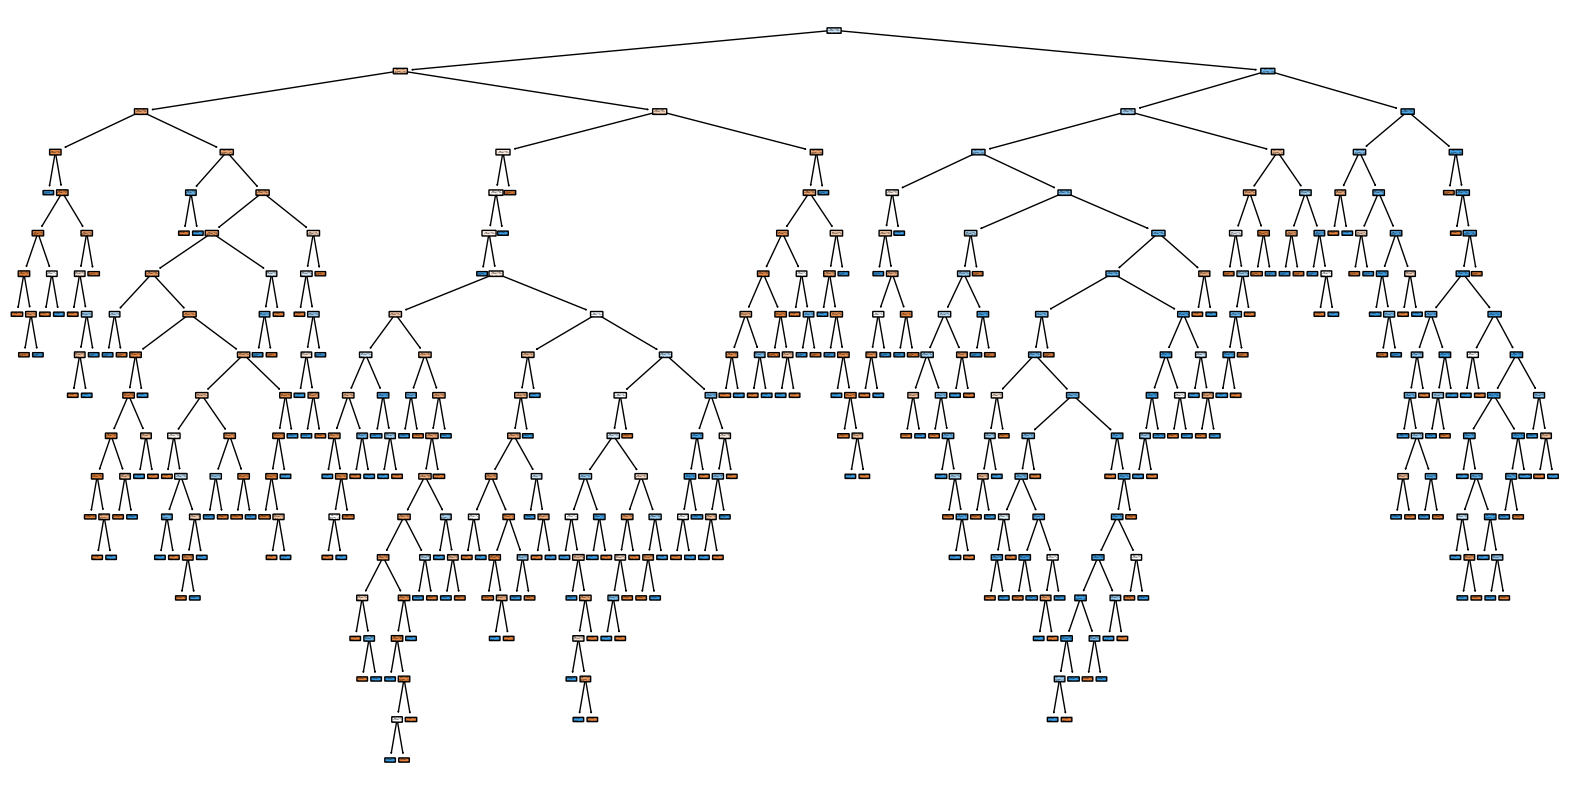

In [112]:
a = DecisionTreeClassifier()
a.fit(x_train, y_train)

x_test['Pos'] = encoder.fit_transform(x_test['Pos'])
print(a.score(x_test, y_test))


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your DecisionTreeClassifier object
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(a, feature_names=features, filled=True, rounded=True)
plt.show()

In [167]:
param_grid = {
    'max_depth': list(range(3, 20)),
    'max_features': list(range(2, 20)),
    'min_samples_split': list(range(30, 75, 5))
}

dt_clf = DecisionTreeClassifier()

gs = GridSearchCV(dt_clf, param_grid, cv=5)

gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [30, 35, 40, 45, 50, 55, 60, 65,
                                               70]})

In [168]:
gs.best_score_

0.7388797888797889

In [169]:
gs.best_params_

{'max_depth': 5, 'max_features': 15, 'min_samples_split': 35}

In [170]:
gs.best_estimator_.score(x_test, y_test)

0.7196765498652291

In [171]:
dec_clf = gs.best_estimator_

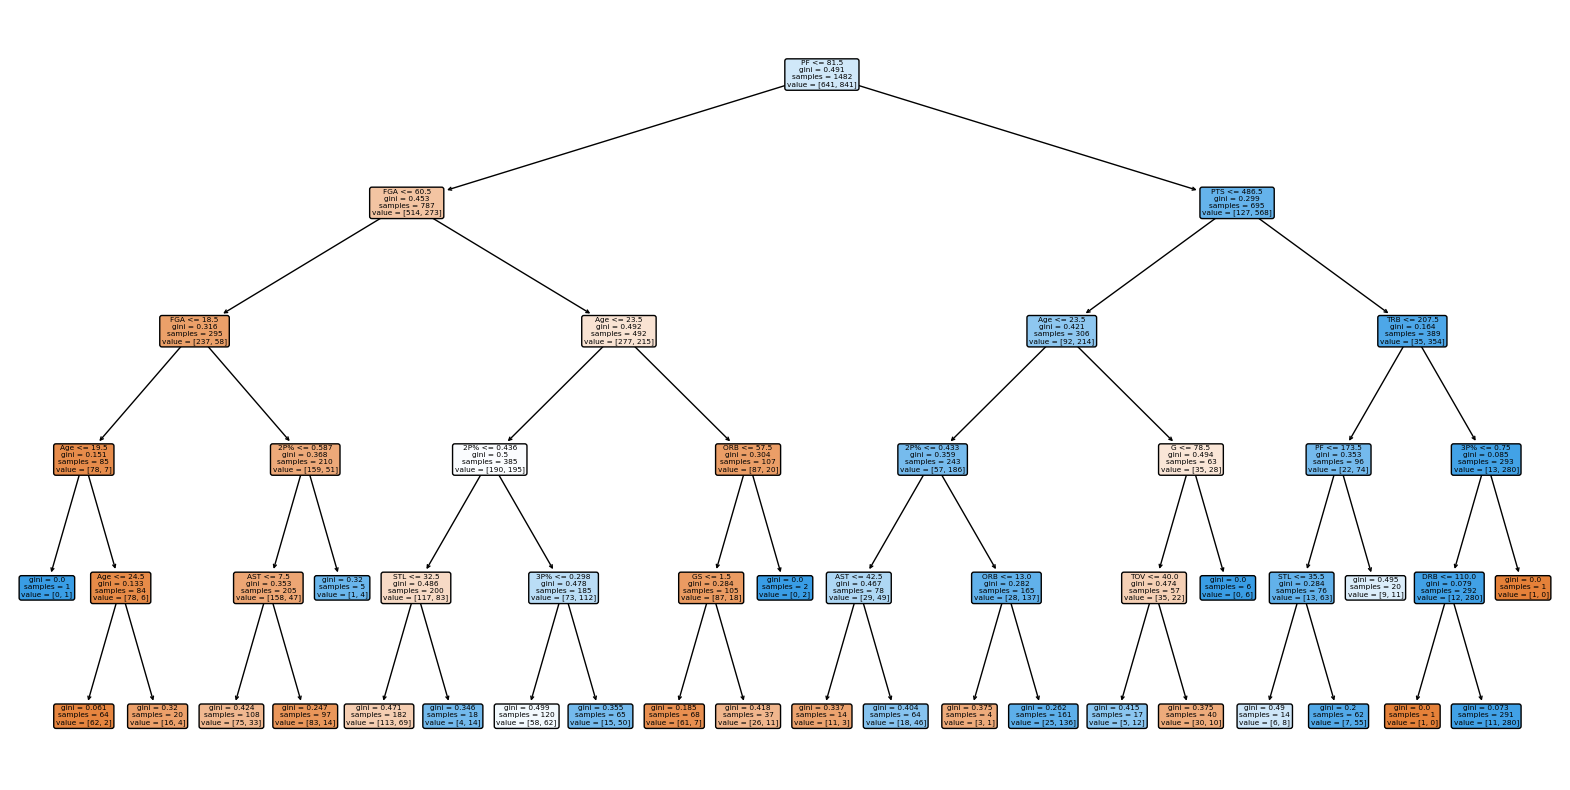

In [172]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your DecisionTreeClassifier object
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(dec_clf, feature_names=features, filled=True, rounded=True)
plt.show()

In [149]:
param_grid = {
}

svm_clf = SVC(kernel='rbf')

gs = GridSearchCV(svm_clf, param_grid, cv=5)

gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={})

In [150]:
gs.best_score_

0.7233278733278734

In [151]:
gs.best_params_

{}

In [152]:
gs.best_estimator_.score(x_test, y_test)

0.6900269541778976

In [153]:
svm_clf = gs.best_estimator_

In [173]:
svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [178]:
from sklearn.ensemble import ExtraTreesClassifier
rnd_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
rnd_clf.score(x_test, y_test)

0.7169811320754716

In [192]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=500,
 algorithm="SAMME.R", learning_rate=0.1)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.7520215633423181

In [240]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train['Pos'] = encoder.fit_transform(x_train['Pos'])
x_test['Pos'] = encoder.fit_transform(x_test['Pos'])


from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=500,
 algorithm="SAMME.R", learning_rate=0.2)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.7520215633423181